# **Challenge HC LEPIC - Sprint 3 - Dynamic Programming**

**Alunos:**
• Pedro Oliveira Valotto - 551445
• Rony Ken Nagai - 551549
• Tomáz Versolato Carballo - 551417
• Lucas Laia Manentti - 97709


Residente: Eduardo
Número de Treinos: 5
Performances: ['ruim', 'satisfatorio', 'ruim', 'bom', 'satisfatorio']

Matriz de Resultados de Experiência:
Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   
1                  |        0.0 |       0.0 |          0.0 |      0.9
2                  |        0.0 |       0.0 |          4.1 |      0.0
3                  |        0.0 |       0.0 |          0.0 |      2.8
4                  |        0.0 |      21.0 |          0.0 |      0.0
5                  |        0.0 |       0.0 |          9.9 |      0.0


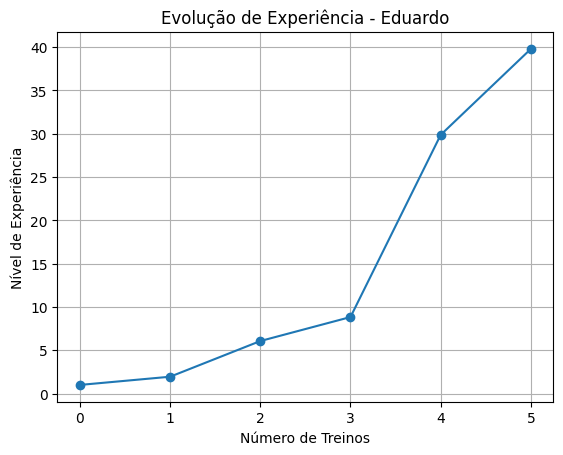

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parâmetros *Obrigatórios
MAX_TREINOS = 20
TIPOS_PERFORMANCE = 4
matriz_resultados = np.zeros((MAX_TREINOS, TIPOS_PERFORMANCE))
performance_map = {"excelente": 0, "bom": 1, "satisfatorio": 2, "ruim": 3}
performances_possiveis = ["excelente", "bom", "satisfatorio", "ruim"]

# Banco de Nomes(Residentes)
nomes_residentes = ["Ana", "Bruno", "Carlos", "Daniela", "Eduardo"]

# Função para calcular experiência e preencher a matriz de resultados
def calcular_experiencia_matriz(treinos, performance, nivel_atual):
    indice_perf = performance_map[performance]
    variacao = random.uniform(0.8, 1.2)  # # Variação aleatória para cada treino(-- feita para representar situações durante o treino,
    # como: precisão, nível de fadiga, concentração...)

    # Modificação: Experiência baseada apenas no treino, sem somar diretamente o nível atual, calcula o nível de performance durante o treino.
    if performance == "excelente":
        experiencia = 10 * treinos * variacao
    elif performance == "bom":
        experiencia = 5 * treinos * variacao
    elif performance == "satisfatorio":
        experiencia = 2 * treinos * variacao
    else:
        experiencia = 1 * treinos * variacao

    # Atualiza a matriz de resultados
    matriz_resultados[treinos-1][indice_perf] = experiencia

    # Modificação: retorna o nível atual somado ao resultado da experiência do treino - Atualiza de acordo com o resultado(treino).
    return experiencia + nivel_atual

# Função para simular a evolução do residente usando a matriz de resultados
def simular_evolucao_com_matriz(residente, treinos, performances):
    nivel_atual = 1  # Nível inicial do residente
    historico_experiencia = [nivel_atual]
    for i in range(treinos):
        performance = performances[i]
        experiencia = calcular_experiencia_matriz(i + 1, performance, nivel_atual)
        nivel_atual = experiencia  # Atualiza o nível atual com a nova experiência
        historico_experiencia.append(nivel_atual)
    return historico_experiencia

# Função para visualizar a matriz de resultados
def visualizar_matriz():
    print("\nMatriz de Resultados de Experiência:")
    print("Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   ")
    for i in range(MAX_TREINOS):
        if np.any(matriz_resultados[i]):
            print(f"{i+1: <18} | {matriz_resultados[i][0]: >10.1f} | {matriz_resultados[i][1]: >9.1f} | {matriz_resultados[i][2]: >12.1f} | {matriz_resultados[i][3]: >8.1f}")

# Função para plotar a evolução do residente com base na matriz
def plotar_evolucao_com_matriz(residente, historico_experiencia):
    plt.plot(historico_experiencia, marker='o')
    plt.title(f'Evolução de Experiência - {residente}')
    plt.xlabel('Número de Treinos')
    plt.ylabel('Nível de Experiência')
    plt.grid(True)
    plt.show()

# Função para gerar performances aleatórias e diversificadas
def gerar_performances_diversificadas(treinos):
    performances = []
    pesos_performances = [0.1, 0.4, 0.4, 0.1]  # Reduzindo a chance de 'excelente' e 'ruim'(Extremos)
    while len(performances) < treinos:
        nova_performance = random.choices(performances_possiveis, pesos_performances, k=1)[0]
        if len(performances) == 0 or nova_performance != performances[-1]:  # Evita repetição consecutiva(resultados)
            performances.append(nova_performance)
    return performances

# Função para gerar um nome aleatório para o residente(aluno)
def gerar_nome_residente():
    return random.choice(nomes_residentes)

# Mostrar exemplo de Aluno
residente = gerar_nome_residente()
treinos = random.randint(5, 15)  # Número de treinos varia de 5(mínimo) a 15(máximo)
performances = gerar_performances_diversificadas(treinos)
print(f"\nResidente: {residente}")
print(f"Número de Treinos: {treinos}")
print(f"Performances: {performances}")

historico = simular_evolucao_com_matriz(residente, treinos, performances)
visualizar_matriz()
plotar_evolucao_com_matriz(residente, historico)

